In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Đọc giá trị capacity
        capacity = int(lines[2])
        # Đọc giá trị values và weights
        values = []
        weights = []
        for line in lines[4:]:
            value, weight = map(int, line.split())
            values.append(value)
            weights.append(weight)
        return values, weights, capacity

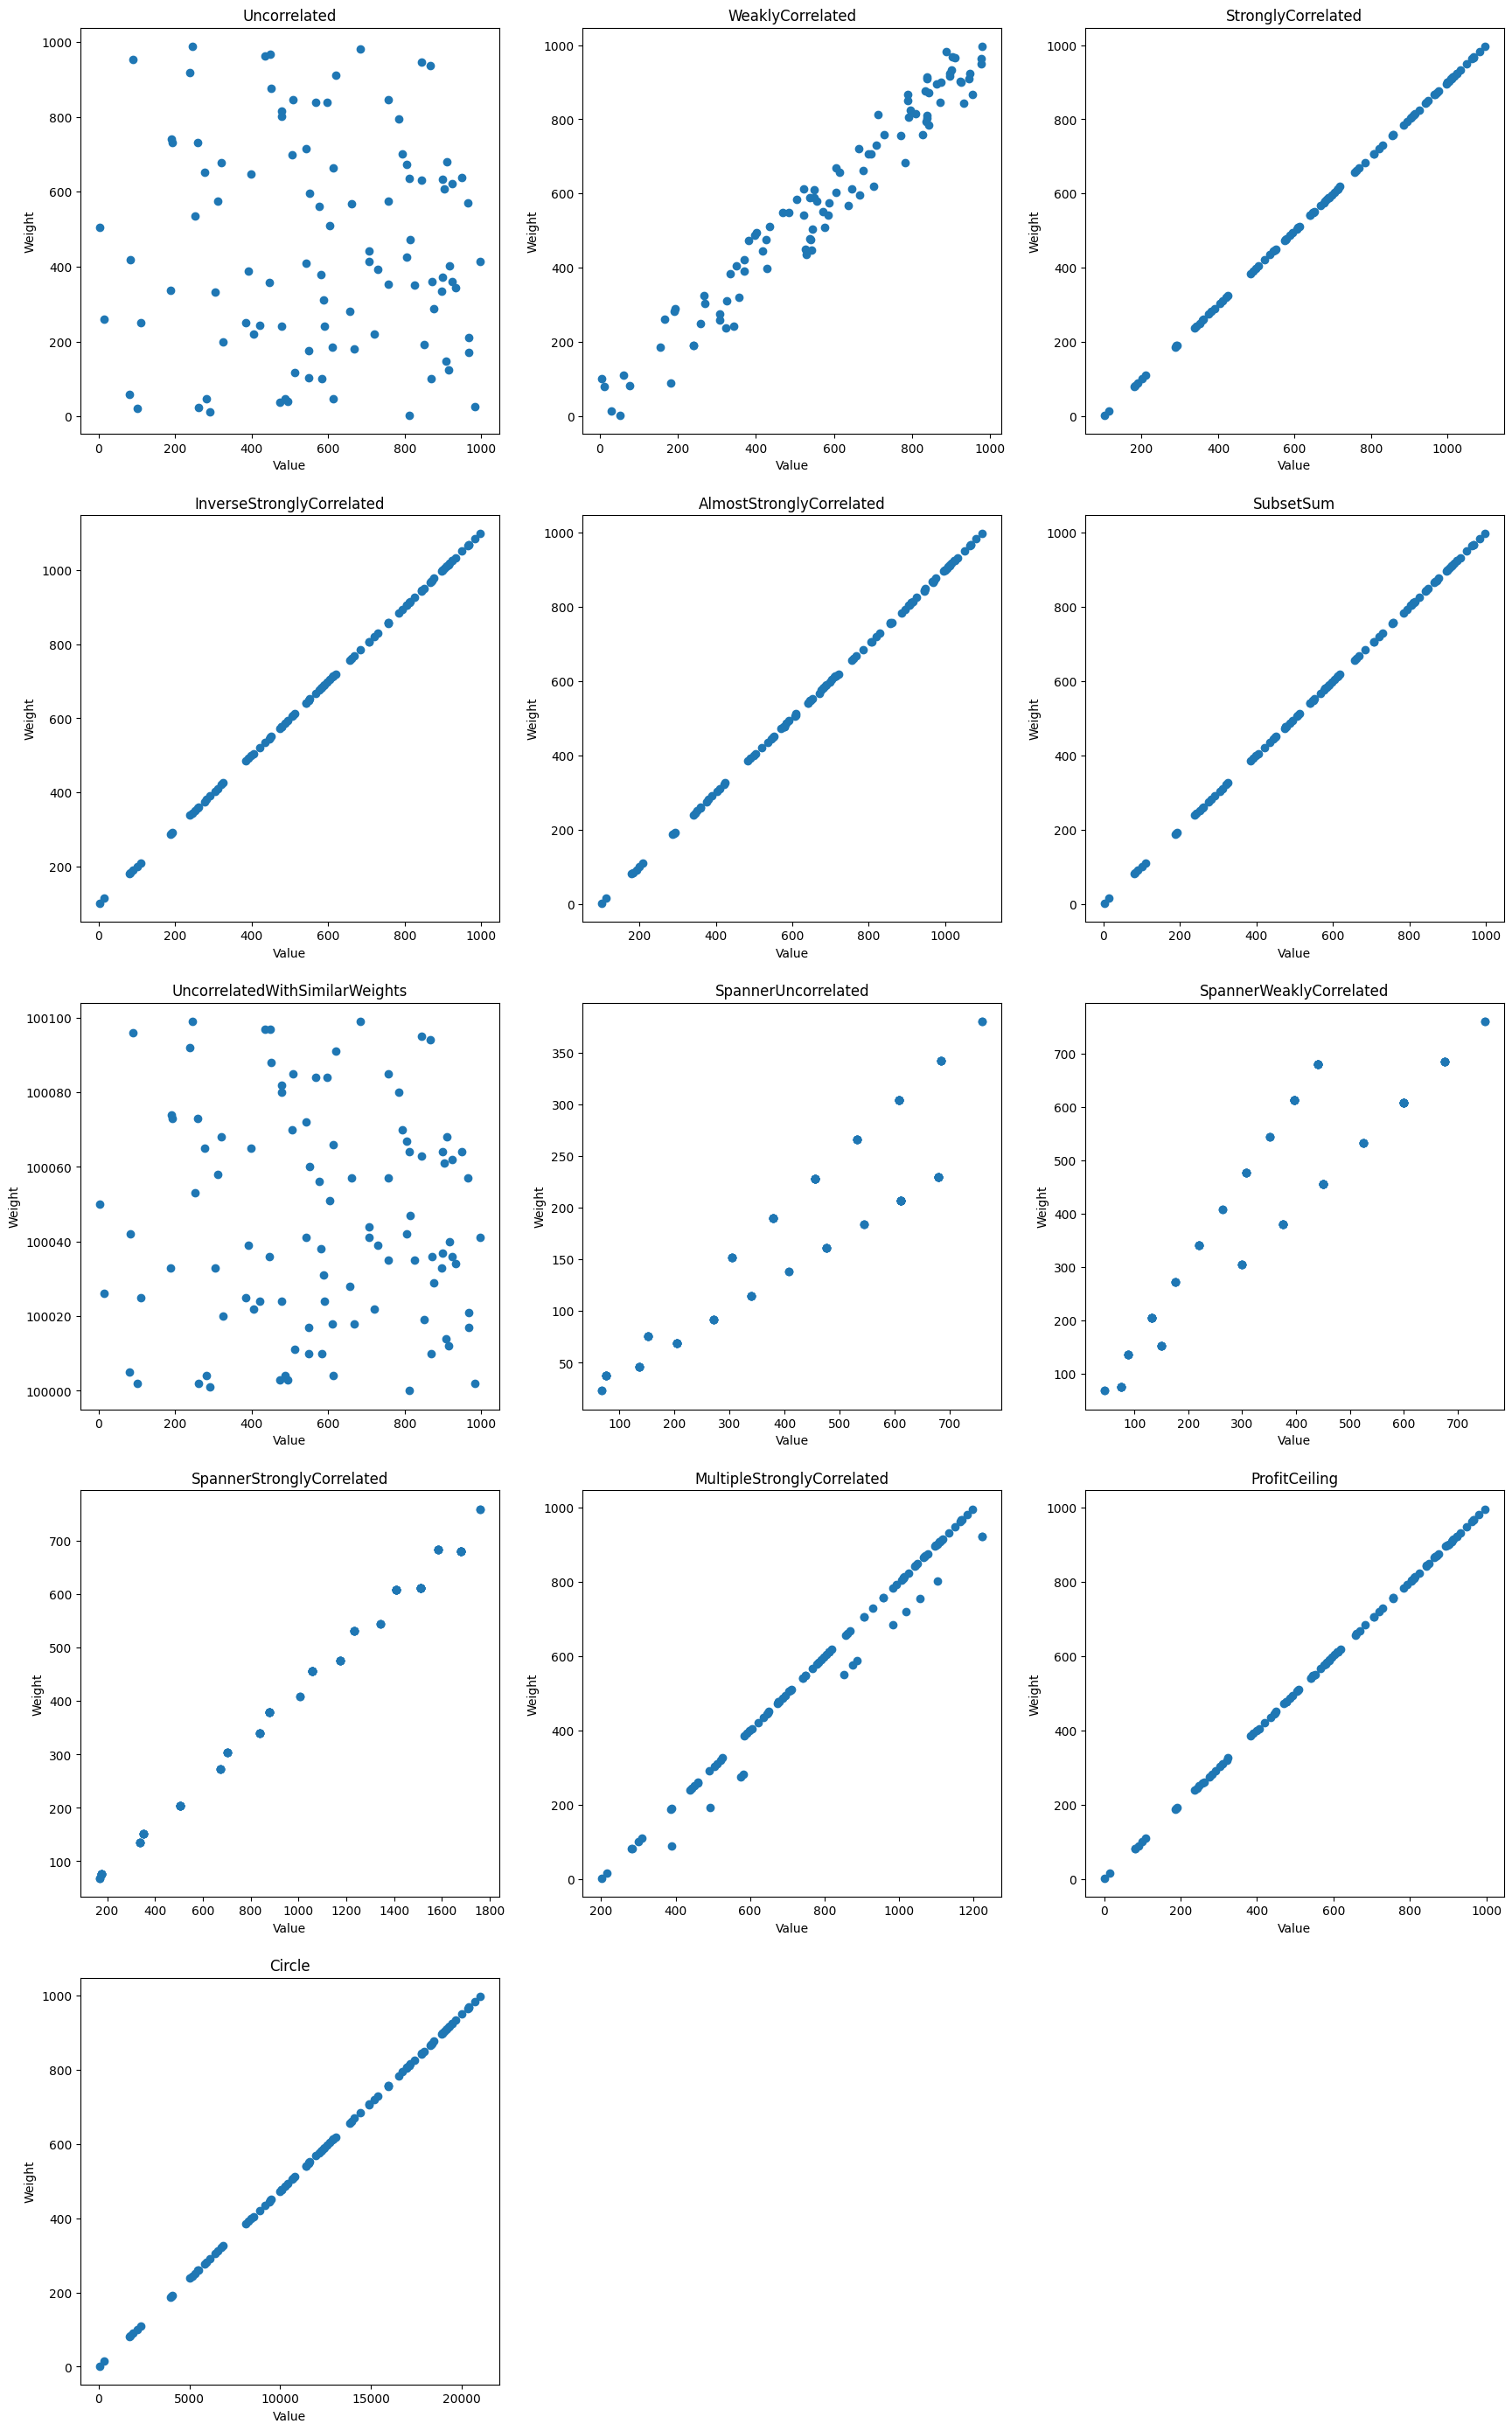

In [5]:
fig, axs = plt.subplots(5, 3, figsize=(21, 35))
files_path = glob.glob(r'kplib-master\*\n00100\R01000\s000.kp')
for i, ax in enumerate(axs.flatten()):
    if i >= len(files_path):
        ax.set_visible(False)
        continue
    values, weights, capacity = read_data(files_path[i])
    ax.scatter(values, weights)
    ax.set_title(files_path[i].split('\\')[1][2:])
    ax.set_xlabel('Value')
    ax.set_ylabel('Weight')

In [40]:
stt = '09'
df = pd.read_csv(f'SCIP result\{stt}.csv')
df

,class,n,R,s,totalValue,totalWeight,processingTime
0,09SpannerStronglyCorrelated,n00050,R01000,s000.kp,28440.0,11540.0,0.006981
1,09SpannerStronglyCorrelated,n00050,R01000,s001.kp,27261.0,6461.0,0.005494
2,09SpannerStronglyCorrelated,n00050,R01000,s002.kp,28713.0,13313.0,0.007485
3,09SpannerStronglyCorrelated,n00050,R01000,s003.kp,25627.0,5327.0,0.005606
4,09SpannerStronglyCorrelated,n00050,R01000,s004.kp,19821.0,2121.0,0.005636
...,...,...,...,...,...,...,...
995,09SpannerStronglyCorrelated,n01000,R10000,s095.kp,4829815.0,1608815.0,0.135576
996,09SpannerStronglyCorrelated,n01000,R10000,s096.kp,5090995.0,1585995.0,1.387887
997,09SpannerStronglyCorrelated,n01000,R10000,s097.kp,4983392.0,1274392.0,0.047766
998,09SpannerStronglyCorrelated,n01000,R10000,s098.kp,4859485.0,1454485.0,2.625893


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           1000 non-null   object 
 1   n               1000 non-null   object 
 2   R               1000 non-null   object 
 3   s               1000 non-null   object 
 4   totalValue      999 non-null    float64
 5   totalWeight     999 non-null    float64
 6   processingTime  999 non-null    float64
dtypes: float64(3), object(4)
memory usage: 54.8+ KB


In [42]:
df.describe()

,totalValue,totalWeight,processingTime
count,9.990000e+02,9.990000e+02,999.000000
mean,9.390117e+05,2.435892e+05,0.242673
std,1.401880e+06,3.976422e+05,1.571815
min,1.309500e+04,8.100000e+02,0.004495
25%,9.333900e+04,2.040600e+04,0.009894
50%,2.907530e+05,7.887500e+04,0.030540
75%,9.266060e+05,2.139920e+05,0.137693
max,5.502457e+06,2.393580e+06,45.428610


In [43]:
df.processingTime.mean()

0.24267328394067894

In [44]:
na_values = df.stack()[df.isna().stack()].index.tolist()
na_values

[]